In [14]:
import pandas as pd
import numpy as np
df=pd.read_csv("titanic-passengerscheck.csv" ,sep=';')
def drop_nan_columns(data, ratio=1.0)->pd.DataFrame:
    """
    The ratio parameter (0.0<=ratio<1.0) lets you drop columns which has 'ratio'% of nans. (i.e if ratio is 0.8 then all columns with 80% or more entries being nan get dropped)
    Returns a new dataframe
    """
    col_list = []
    na_df = data.isna()
    total_size = na_df.shape[0]
    for col in na_df:
        a = na_df[col].value_counts()
        if False not in a.keys():
            col_list.append(col)
        elif True not in a.keys():
            pass
        else:
            if a[True]/total_size >= ratio:
                col_list.append(col)
    print(f"{len(col_list)} columns dropped- {col_list}")
    return data.drop(col_list, axis=1)
#supprimer les columns qui ont 60% des valeurs nulls
df =drop_nan_columns(df, ratio=0.6)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(method="ffill",inplace=True)
survived_num={"Survived":{"Yes":1,"No":0}}
df.replace(survived_num, inplace=True)
sex_num={"Sex":{"male":0,"female":1}}
df.replace(sex_num, inplace=True)
df=df.drop("PassengerId",axis=1)
df=df.drop("Name",axis=1)
df=df.drop("Embarked",axis=1)
df.head()

1 columns dropped- ['Cabin']


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,2,0,28.0,0,0,248740,13.0000
1,0,3,0,25.0,0,0,348123,7.6500
2,0,3,0,20.0,0,0,350050,7.8542
3,0,3,1,29.0,0,4,349909,21.0750
4,0,1,0,31.0,1,0,F.C. 12750,52.0000


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#features extraction
x = df[['Pclass', 'Sex','Age','Parch']]
y = df ['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Age', ylabel='Survived'>

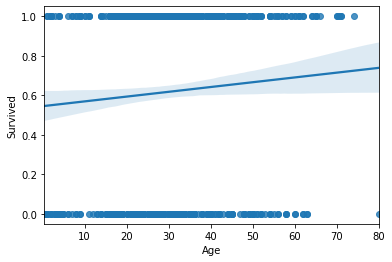

In [11]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=df)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

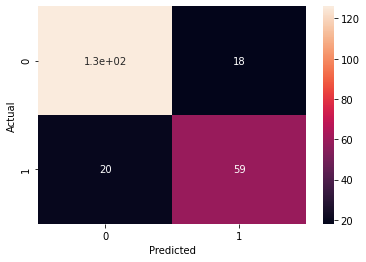

In [16]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


0.8397943037974684


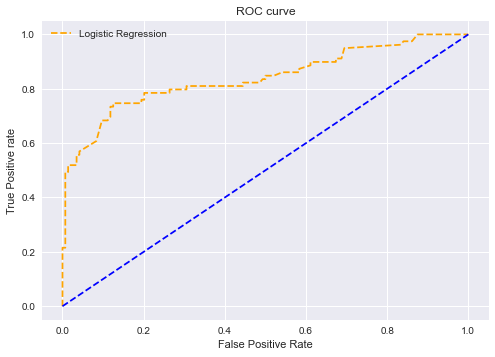

In [21]:
from sklearn.metrics import roc_curve
pred_prob1 = logreg.predict_proba(x_test)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])


print(auc_score1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();